### 5. **Análisis de Correlación y Regresión**
**Resumen:** Se centra en la identificación de relaciones significativas entre las variables numéricas y el desarrollo de modelos de regresión para hacer predicciones basadas en esas relaciones.

In [2]:
# Llegim les dades del dataframe y preparem la columna date correctament

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

region_classification = {
'Albany': 'City',
'Atlanta': 'City',
'BaltimoreWashington': 'Region',
'Boise': 'City',
'Boston': 'City',
'BuffaloRochester': 'Region',
'California': 'GreaterRegion',
'Charlotte': 'City',
'Chicago': 'City',
'CincinnatiDayton': 'Region',
'Columbus': 'City',
'DallasFtWorth': 'Region',
'Denver': 'City',
'Detroit': 'City',
'GrandRapids': 'City',
'GreatLakes': 'GreaterRegion',
'HarrisburgScranton': 'Region',
'HartfordSpringfield': 'Region',
'Houston': 'City',
'Indianapolis': 'City',
'Jacksonville': 'City',
'LasVegas': 'City',
'LosAngeles': 'City',
'Louisville': 'City',
'MiamiFtLauderdale': 'Region',
'Midsouth': 'GreaterRegion',
'Nashville': 'City',
'NewOrleansMobile': 'Region',
'NewYork': 'City',
'Northeast': 'GreaterRegion',
'NorthernNewEngland': 'Region',
'Orlando': 'City',
'Philadelphia': 'City',
'PhoenixTucson': 'Region',
'Pittsburgh': 'City',
'Plains': 'GreaterRegion',
'Portland': 'City',
'RaleighGreensboro': 'Region',
'RichmondNorfolk': 'Region',
'Roanoke': 'City',
'Sacramento': 'City',
'SanDiego': 'City',
'SanFrancisco': 'City',
'Seattle': 'City',
'SouthCarolina': 'Region',
'SouthCentral': 'GreaterRegion',
'Southeast': 'GreaterRegion',
'Spokane': 'City',
'StLouis': 'City',
'Syracuse': 'City',
'Tampa': 'City',
'TotalUS': 'TotalUS',
'West': 'GreaterRegion',
'WestTexNewMexico': 'Region'
}

classification_colors = {'City':'green' ,'Region':'yellow' ,'GreaterRegion':'orange', 'State':'red', 'TotalUS': 'blue'}

df_cp['region_class']= df_cp['region'].map(region_classification)

df_cp = df_cp.rename(columns={df.columns[0]: 'Col_0'}) # Primera columna sin titulo, potencialmente eliminable
df_cp = df_cp.rename(columns={'4046': 'Volume_Hass_S'}) # Etiquetas mas descritivas
df_cp = df_cp.rename(columns={'4225': 'Volume_Hass_L'})
df_cp = df_cp.rename(columns={'4770': 'Volume_Hass_XL'})
df_cp_cleaned = df_cp.drop('Col_0', axis=1) # Parecen IDs del 0 al 52. Eliminable. # Col_0 = df_cp['Col_0'].unique()  print(f"Col_0: {Col_0}\n")
df_cp_cleaned = df_cp[df_cp.region != 'TotalUS'] # Para seleccionar unicamente las regiones propias , descartamos Total US para la vista gráfica

## 1. **Matriz de Correlación:** 
   - **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.

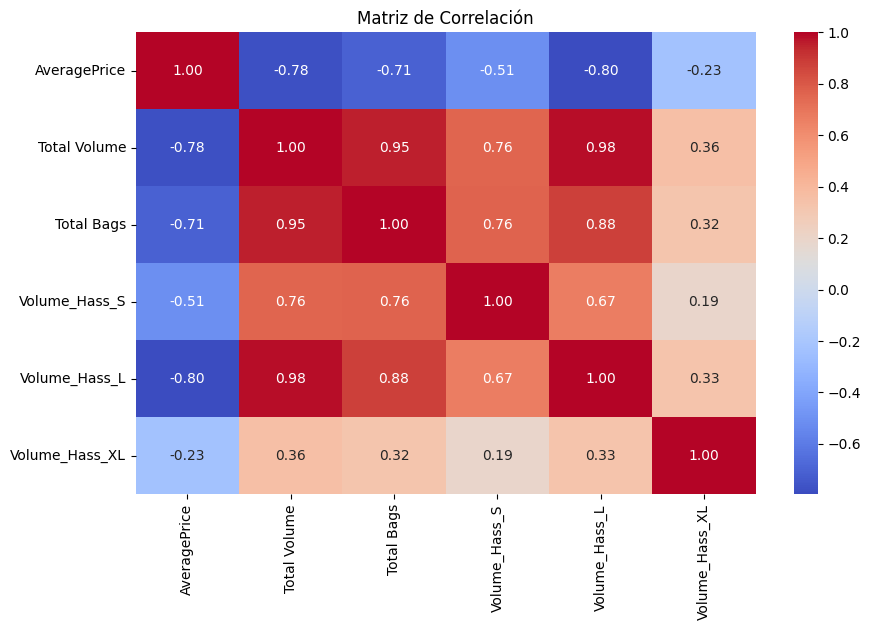

Variables altamente correlacionadas con otras: ['Total Volume', 'Total Bags', 'Volume_Hass_L']


In [3]:
df_corr_gen= df_cp.copy()

df_corr_gen = df_corr_gen[df_corr_gen['region']=='Philadelphia']

# df_corr_gen = df_corr_gen[(df_corr_gen['region_class']== 'City') | (df_corr_gen['region_class']== 'Region')]

corr_df= df_corr_gen[['AveragePrice', 'Total Volume', 'Total Bags' ,'Volume_Hass_S', 'Volume_Hass_L', 'Volume_Hass_XL']]
# Calcular la matriz de correlación
corr_matrix = corr_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Identificar columnas con correlación alta (umbral = 0.8)
threshold = 0.8
to_drop = []
for column in corr_matrix.columns:
    if any((corr_matrix[column].abs() > threshold) & (corr_matrix.index != column)):
        to_drop.append(column)
        
print(f"Variables altamente correlacionadas con otras: {to_drop}")


## 2. **Análisis de Dispersión entre Variables Clave:** 
   - **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.

In [4]:
df_local = df_cp.copy()
df_local= df_local[df_local['type']=='organic']
df_local= df_local[df_local['region']=='TotalUS']
df_local = df_local[df_local['AveragePrice']==1.0]
display(df_local)

,Col_0,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_class
11798,20,2015-08-09,1.0,625259.0,170184.0,269330.0,6905.0,178838.0,126058.0,52779.0,0.0,organic,2015,TotalUS,TotalUS
11799,21,2015-08-02,1.0,573873.0,164126.0,263359.0,5115.0,141271.0,93120.0,48151.0,0.0,organic,2015,TotalUS,TotalUS
11800,22,2015-07-26,1.0,580826.0,169940.0,266249.0,4391.0,140244.0,71807.0,68436.0,0.0,organic,2015,TotalUS,TotalUS
11801,23,2015-07-19,1.0,650389.0,159752.0,317728.0,4758.0,168149.0,81667.0,86482.0,0.0,organic,2015,TotalUS,TotalUS
11802,24,2015-07-12,1.0,608845.0,178871.0,267353.0,5093.0,157526.0,80220.0,77305.0,0.0,organic,2015,TotalUS,TotalUS
11803,25,2015-07-05,1.0,668233.0,205073.0,304597.0,6251.0,152309.0,88261.0,64048.0,0.0,organic,2015,TotalUS,TotalUS


<Figure size 640x480 with 0 Axes>

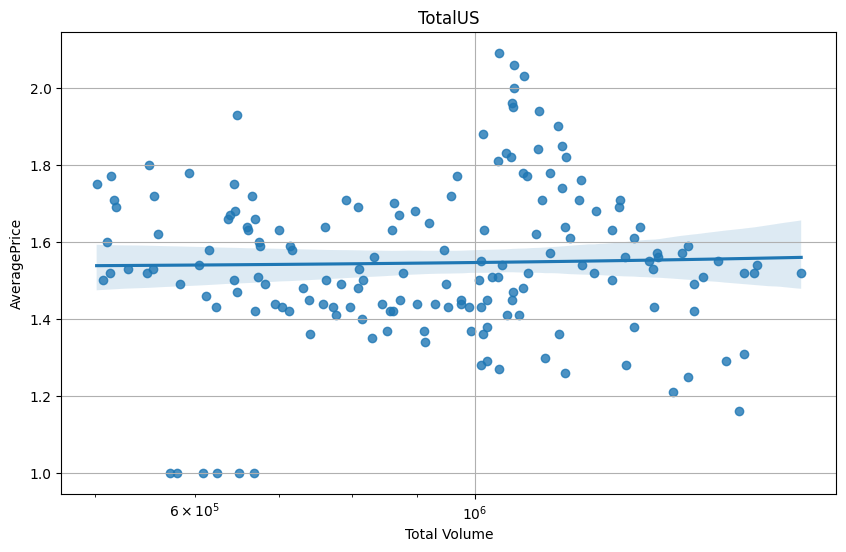

<Figure size 640x480 with 0 Axes>

In [5]:
# df_local = df_cp.copy()
# df_local= df_local[df_local['type']=='conventional']

# # df_local = df_cp[(df_cp['region']!='TotalUS')&(df_cp['region_class']!='GreaterRegion')].copy()
# df_local_USA=df_local[df_local['region_class']=='TotalUS']

# fig, ax= plt.subplots(figsize=(10,6))

# # sns.scatterplot(data= df_local , x=df_local['Total Volume'], y=df_local['AveragePrice'], alpha= 0.1)
# sns.regplot(data= df_local_USA , x=df_local_USA['Total Volume'], y=df_local_USA['AveragePrice'], order=1)#, line=True)
# plt.xscale('log')
# plt.grid()
# plt.title('Conventional')
# plt.figure()

df_local = df_cp.copy()
df_local= df_local[df_local['type']=='organic']

# df_local = df_cp[(df_cp['region']!='TotalUS')&(df_cp['region_class']!='GreaterRegion')].copy()
df_local_USA=df_local[df_local['region_class']=='TotalUS']

fig, ax= plt.subplots(figsize=(10,6))

# sns.scatterplot(data= df_local , x=df_local['Total Volume'], y=df_local['AveragePrice'], alpha= 0.1)
sns.regplot(data= df_local_USA , x=df_local_USA['Total Volume'], y=df_local_USA['AveragePrice'], order=1)#, line=True)
plt.xscale('log')
plt.grid()
plt.title('TotalUS')
plt.figure()

<Figure size 640x480 with 0 Axes>

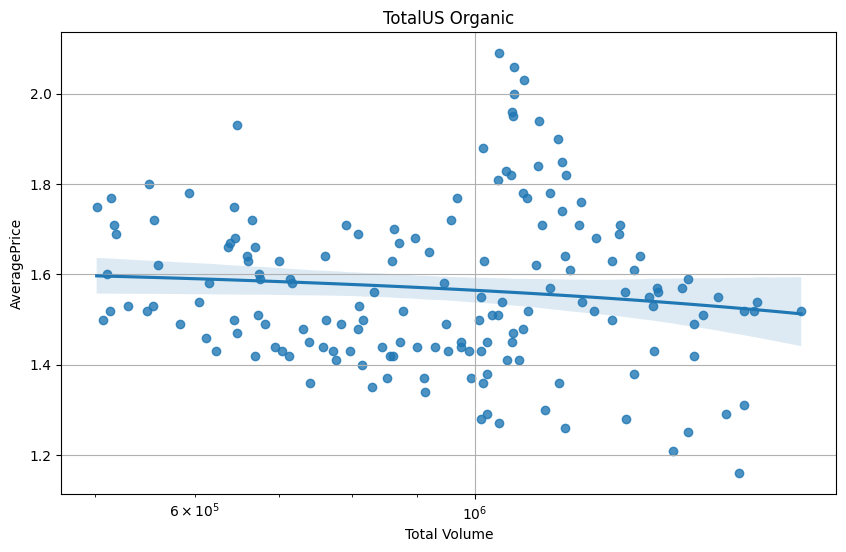

<Figure size 640x480 with 0 Axes>

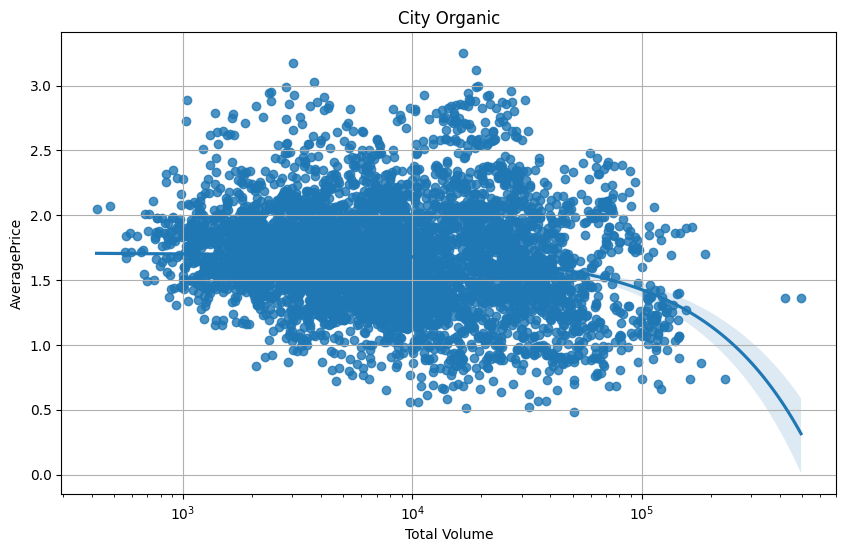

<Figure size 640x480 with 0 Axes>

In [6]:
df_local = df_cp.copy()
df_local= df_local[df_local['type']=='organic']

# df_local = df_cp[(df_cp['region']!='TotalUS')&(df_cp['region_class']!='GreaterRegion')].copy()
df_local_USA=df_local[df_local['region_class']=='TotalUS']
df_local_USA=df_local_USA[df_local_USA['AveragePrice']>1.1]

fig, ax= plt.subplots(figsize=(10,6))

# sns.scatterplot(data= df_local , x=df_local['Total Volume'], y=df_local['AveragePrice'], alpha= 0.1)
sns.regplot(data= df_local_USA , x=df_local_USA['Total Volume'], y=df_local_USA['AveragePrice'], order=1)#, line=True)
plt.xscale('log')
plt.grid()
plt.title('TotalUS Organic')
plt.figure()

# df_local = df_cp[(df_cp['region']!='TotalUS')&(df_cp['region_class']!='GreaterRegion')].copy()
df_local_region=df_local[df_local['region_class']=='City']

fig, ax= plt.subplots(figsize=(10,6))

# sns.scatterplot(data= df_local , x=df_local['Total Volume'], y=df_local['AveragePrice'], alpha= 0.1)
sns.regplot(data= df_local_region , x=df_local_region['Total Volume'], y=df_local_region['AveragePrice'], order=1)#, line=True)
plt.xscale('log')
plt.title('City Organic')
plt.grid()
plt.figure()

<Figure size 640x480 with 0 Axes>

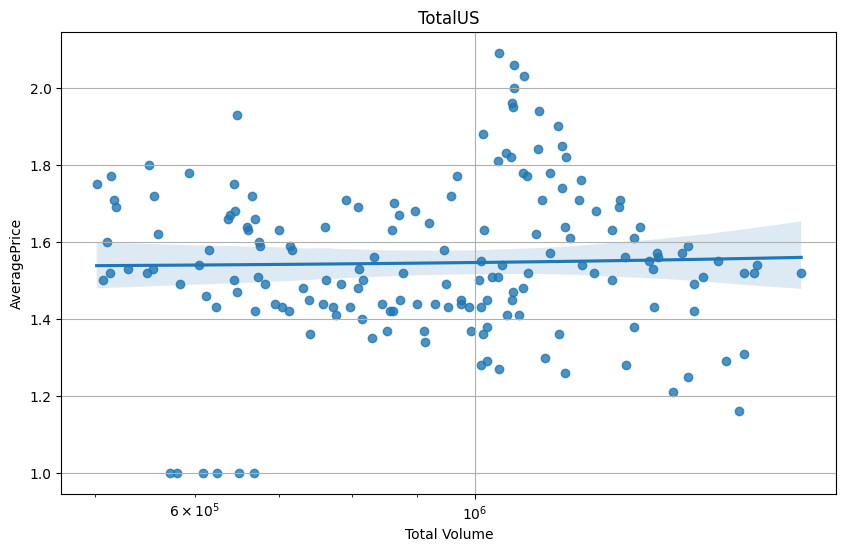

<Figure size 640x480 with 0 Axes>

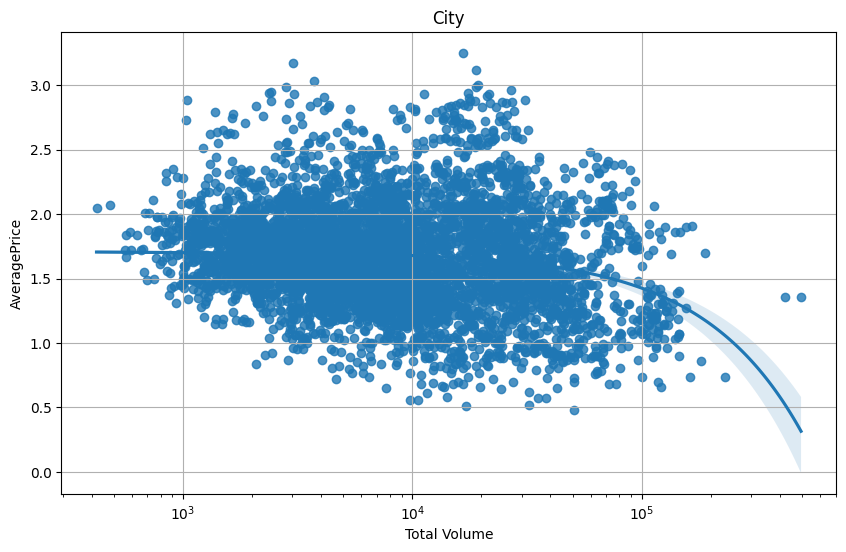

<Figure size 640x480 with 0 Axes>

In [9]:
df_local = df_cp.copy()
df_local= df_local[df_local['type']=='organic']

# df_local = df_cp[(df_cp['region']!='TotalUS')&(df_cp['region_class']!='GreaterRegion')].copy()
df_local_USA=df_local[df_local['region_class']=='TotalUS']

fig, ax= plt.subplots(figsize=(10,6))

# sns.scatterplot(data= df_local , x=df_local['Total Volume'], y=df_local['AveragePrice'], alpha= 0.1)
sns.regplot(data= df_local_USA , x=df_local_USA['Total Volume'], y=df_local_USA['AveragePrice'], order=1)#, line=True)
plt.xscale('log')
plt.grid()
plt.title('TotalUS')
plt.figure()

# df_local = df_cp[(df_cp['region']!='TotalUS')&(df_cp['region_class']!='GreaterRegion')].copy()
df_local_region=df_local[df_local['region_class']=='City']

fig, ax= plt.subplots(figsize=(10,6))

# sns.scatterplot(data= df_local , x=df_local['Total Volume'], y=df_local['AveragePrice'], alpha= 0.1)
sns.regplot(data= df_local_region , x=df_local_region['Total Volume'], y=df_local_region['AveragePrice'], order=1)#, line=True)
plt.xscale('log')
plt.title('City')
plt.grid()
plt.figure()

3. **Predicciones Mensuales Usando Datos Trimestrales:**
   - **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.


In [202]:
df_local= df_cp.copy()

# df_local= df_local[df_local['region']=='West']
# df_local= df_local[df_local['type']=='conventional']

df_local['Month'] = df_local['Date'].dt.to_period('M')
df_local['Day'] = df_local['Date'].dt.to_period('d')#.weekday()
df_local['Quarter'] = df_local['Date'].dt.to_period('Q')
df_local['Week'] = df_local['Date'].dt.to_period('W')
df_local['Quarter Month'] = df_local['Month'].map(lambda x: (x.month - 1) % 3 + 1 )

df_fit = df_local[df_local['Quarter Month']!=3 ]
df_check = df_local[df_local['Quarter Month']==3 ]

group_fit = df_fit.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
group_fit['Quarter_n']=group_fit['Quarter'].map(lambda date: (date.month - 1) // 3 + 1)
# group_fit['Total Volume'] = np.log(group_fit['Total Volume'])

group_check = df_check.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
group_check['Quarter_n']=group_fit['Quarter'].map(lambda date: (date.month - 1) // 3 + 1)
# group_check['Total Volume'] = np.log(group_check['Total Volume'])

# group_fit.info()

# df_local

# group_fit


In [201]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# Importar las bibliotecas necesarias para el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba
# group_fit = df_fit.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
X_train= group_fit['Total Volume'].to_frame()
y_train= group_fit['AveragePrice']

# group_check = df_fit.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
X_test= group_check['Total Volume'].to_frame()
y_test= group_check['AveragePrice']

# ##########################################
# np.random.seed(42)
# X1 = np.random.rand(100)
# data = pd.DataFrame({
#     'X1': X1,
#     'X2': (X1 * 0.4) + 0.2,  # Alta correlación con X1
#     'X3': np.random.rand(100),               # Variable independiente
#     'X4': np.random.rand(100),               # Variable independiente
#     'Y': np.random.rand(100)                 # Variable objetivo
# })

# data_cleaned = data.drop(columns=['X2'])

# X = data_cleaned.drop(columns='Y')
# y = data_cleaned['Y']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train)
##########################################
# Aplicar un modelo de regresión lineal para interpolar
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# Comparar los primeros 10 valores entre el valor predicho y el valor real
comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

# Calcular el error porcentual
comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)


# Calcular el error cuadrático medio (MSE) para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

# Calcular el valor R²
r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0    1.361981        1.457231         -6.993416
1    1.399074        1.390406          0.619524
2    1.449144        1.465267         -1.112623
3    1.305244        1.511523        -15.803887
4    1.224213        1.377051        -12.484576
5    1.283056        1.349849         -5.205829
6    1.427870        1.418188          0.678086
7    1.315995        1.462095        -11.101857
8    1.398935        1.423026         -1.722096
9    1.545395        1.347016         12.836834

Error cuadrático medio (MSE) del modelo: 0.0187

Valor R² del modelo: 0.1484


## 4. **Predicciones Trimestrales:**
   - **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [308]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

df_local= df_cp.copy()

df_local= df_local[df_local['region']=='West']
df_local= df_local[df_local['type']=='conventional']

df_local['Month'] = df_local['Date'].dt.to_period('M')
df_local['Day'] = df_local['Date'].dt.to_period('d')#.weekday()
df_local['Quarter'] = df_local['Date'].dt.to_period('Q')
df_local['Week'] = df_local['Date'].dt.to_period('W')
df_local['Quarter Month'] = df_local['Month'].map(lambda x: (x.month - 1) % 3 + 1 )
df_local['n_Quarter'] = df_local['Month'].map(lambda date: (date.month - 1) // 3 + 1)

df_year = df_local[df_local['year']==2016]

########
df_train = df_year[df_year['n_Quarter'].isin([1,2,3]) ]
df_test= df_year[df_year['n_Quarter']==4 ]
# display(df_local)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train= df_train['Total Volume'].to_frame()
y_train= df_train['AveragePrice']

X_test= df_test['Total Volume'].to_frame()
y_test= df_test['AveragePrice']

###########
# Aplicar un modelo de regresión lineal para interpolar
poly_features = PolynomialFeatures(degree=2)
poly_model = LinearRegression()

X_poly = poly_features.fit_transform(X_train)
poly_model.fit(X_poly, y_train)
y_pred_poly_train = poly_model.predict(X_poly)

X_test_poly= poly_features.fit_transform(X_test)
y_pred_poly_test = poly_model.predict(X_test_poly)


r2_poly = r2_score(y_test, y_pred_poly_test)
rmse_poly = root_mean_squared_error(y_test, y_pred_poly_test)

#     "coeficientes": poly_model.coef_}


# Comparar los primeros 10 valores entre el valor predicho y el valor real
comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred_poly[:10]
})

# Calcular el error porcentual
comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100
print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)

# Calcular el error cuadrático medio (MSE) para evaluar el modelo
print(f"\nError cuadrático medio (MSE) del modelo: {rmse_poly:.4f}")

# Calcular el valor R²
print(f"\nValor R² del modelo: {r2_poly:.4f}")


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0        0.92        1.343919        -46.078188
1        0.88        1.344381        -52.770561
2        0.84        1.344083        -60.009913
3        0.93        1.339763        -44.060513
4        1.09        1.345510        -23.441291
5        1.10        1.344260        -22.205479
6        1.18        1.344940        -13.977957
7        1.26        1.345614         -6.794787
8        1.26        1.345489         -6.784822
9        1.17        1.341956        -14.697090

Error cuadrático medio (MSE) del modelo: 0.1181

Valor R² del modelo: 0.2388


## 5. **Predicciones Anuales:**
   - **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

df_local= df_cp.copy()

df_local= df_local[df_local['region']=='West']
# df_local= df_local[df_local['type']=='conventional']

df_local['Month'] = df_local['Date'].dt.to_period('M')
df_local['Day'] = df_local['Date'].dt.to_period('d')#.weekday()
df_local['Quarter'] = df_local['Date'].dt.to_period('Q')
df_local['Week'] = df_local['Date'].dt.to_period('W')
df_local['Quarter Month'] = df_local['Month'].map(lambda x: (x.month - 1) % 3 + 1 )
df_local['n_Quarter'] = df_local['Month'].map(lambda date: (date.month - 1) // 3 + 1)

# df_year = df_local[df_local['year']==2016]

########
df_train = df_local[df_local['year'].isin([2015,2016]) ]
df_test= df_local[df_local['year']==2017 ]
# display(df_train)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train= df_train['Total Volume'].to_frame()
y_train= df_train['AveragePrice']

X_test= df_test['Total Volume'].to_frame()
y_test= df_test['AveragePrice']

###########
# Aplicar un modelo de regresión lineal para interpolar
poly_features = PolynomialFeatures(degree=1)
poly_model = LinearRegression()

X_poly = poly_features.fit_transform(X_train)
poly_model.fit(X_poly, y_train)
y_pred_poly_train = poly_model.predict(X_poly)

X_test_poly= poly_features.fit_transform(X_test)
y_pred_poly_test = poly_model.predict(X_test_poly)


r2_poly = r2_score(y_test, y_pred_poly_test)
rmse_poly = mean_squared_error(y_test, y_pred_poly_test)

#     "coeficientes": poly_model.coef_}


# Comparar los primeros 10 valores entre el valor predicho y el valor real
comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred_poly[:10]
})

# Calcular el error porcentual
comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100
print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)

# Calcular el error cuadrático medio (MSE) para evaluar el modelo
print(f"\nError cuadrático medio (MSE) del modelo: {rmse_poly:.4f}")

# Calcular el valor R²
print(f"\nValor R² del modelo: {r2_poly:.4f}")


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0        0.94        1.343919        -42.970141
1        1.10        1.344381        -22.216449
2        1.05        1.344083        -28.007930
3        0.96        1.339763        -39.558622
4        0.98        1.345510        -37.296946
5        1.18        1.344260        -13.920362
6        1.04        1.344940        -29.321144
7        1.01        1.345614        -33.229140
8        1.06        1.345489        -26.932902
9        1.23        1.341956         -9.102110

Error cuadrático medio (MSE) del modelo: 0.1612

Valor R² del modelo: 0.2969


## 6. **Desarrollo de Modelos de Regresión Múltiple:** 
   - **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.

In [349]:
from sklearn import preprocessing

df_local = df_cp.copy()

df_local=df_local[df_local['region']=='West']
# df_local=df_local[df_local['type']=='conventional']

bool_org= {'organic':1, 'conventional':0}

df_local['Month'] = df_local['Date'].dt.to_period('M')
df_local['Quarter'] = df_local['Date'].dt.to_period('Q')
df_local['Quarter Month'] = df_local['Month'].map(lambda x: (x.month - 1) % 3 + 1 )
df_local['n_Quarter'] = df_local['Month'].map(lambda date: (date.month - 1) // 3 + 1)
df_local['type_Bool'] = df_local['type'].map(bool_org)

df_local['Standard Volume'] = (df_local['Total Volume'] - df_local['Total Volume'].mean()) /df_local['Total Volume'].std()
df_local['ST_Volume_Hass_S'] = (df_local['Volume_Hass_S'] - df_local['Volume_Hass_S'].mean()) /df_local['Volume_Hass_S'].std()
df_local['ST_Volume_Hass_L'] = (df_local['Volume_Hass_L'] - df_local['Volume_Hass_L'].mean()) /df_local['Volume_Hass_L'].std()
df_local['ST_Volume_Hass_XL'] = (df_local['Volume_Hass_XL'] - df_local['Volume_Hass_XL'].mean()) /df_local['Volume_Hass_XL'].std()
df_local['Standard Bags'] = (df_local['Total Bags'] - df_local['Total Bags'].mean()) /df_local['Total Bags'].std()


# display(df_local)

Variables = ['Standard Volume', 'ST_Volume_Hass_S', 'ST_Volume_Hass_L', 'ST_Volume_Hass_XL', 'Standard Bags', 'n_Quarter', 'year', 'type_Bool']
# group_fit = df_fit.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
X= df_local[Variables]
Y= df_local['AveragePrice']#.to_frame()

X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.2, random_state=42)

# group_check = df_fit.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
# X_test= df_year.loc[2:3,'Total Volume'].to_frame()
# y_test= df_year.loc[2:3,'AveragePrice']#.to_frame()

model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# Comparar los primeros 10 valores entre el valor predicho y el valor real
comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

# Calcular el error porcentual
comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)


# Calcular el error cuadrático medio (MSE) para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")


for i in range(0, len(Variables)):
    
    print(f'El coeficiente {Variables[i]}\t \t: {model.coef_[i]}')

# Calcular el valor R²
r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0        1.04        1.346012        -29.424213
1        1.41        1.633460        -15.848261
2        1.83        1.481107         19.065204
3        1.01        0.974764          3.488690
4        1.37        1.265711          7.612305
5        1.53        1.372671         10.282910
6        0.99        0.873281         11.789797
7        1.39        1.390366         -0.026329
8        1.43        1.267326         11.375813
9        0.98        1.045380         -6.671471

Error cuadrático medio (MSE) del modelo: 0.0424
El coeficiente Standard Volume	 	: -0.05010627011000214
El coeficiente ST_Volume_Hass_S	 	: 0.053397986048750054
El coeficiente ST_Volume_Hass_L	 	: -0.05476203655257157
El coeficiente ST_Volume_Hass_XL	 	: 0.0018534907128084643
El coeficiente Standard Bags	 	: -0.14610341859083548
El coeficiente n_Quarter	 	: 0.10528970208047722
El coefic

7. **Análisis de Coeficientes de Regresión Múltiple:**
   - **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.

In [350]:
for i in range(0, len(Variables)):
    
    print(f'El coeficiente {Variables[i]}\t \t: {model.coef_[i]}')

El coeficiente Standard Volume	 	: -0.05010627011000214
El coeficiente ST_Volume_Hass_S	 	: 0.053397986048750054
El coeficiente ST_Volume_Hass_L	 	: -0.05476203655257157
El coeficiente ST_Volume_Hass_XL	 	: 0.0018534907128084643
El coeficiente Standard Bags	 	: -0.14610341859083548
El coeficiente n_Quarter	 	: 0.10528970208047722
El coeficiente year	 	: 0.1285164370946673
El coeficiente type_Bool	 	: 0.23030004503392748


8. **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**
   - **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.

In [364]:
from sklearn import preprocessing

df_local = df_cp.copy()

df_local=df_local[df_local['region']=='West']
# df_local=df_local[df_local['type']=='conventional']

bool_org= {'organic':1, 'conventional':0}

df_local['Month'] = df_local['Date'].dt.to_period('M')
df_local['Quarter'] = df_local['Date'].dt.to_period('Q')
df_local['Quarter Month'] = df_local['Month'].map(lambda x: (x.month - 1) % 3 + 1 )
df_local['n_Quarter'] = df_local['Month'].map(lambda date: (date.month - 1) // 3 + 1)
df_local['type_Bool'] = df_local['type'].map(bool_org)

df_local['Standard Volume'] = (df_local['Total Volume'] - df_local['Total Volume'].mean()) /df_local['Total Volume'].std()
df_local['ST_Volume_Hass_S'] = (df_local['Volume_Hass_S'] - df_local['Volume_Hass_S'].mean()) /df_local['Volume_Hass_S'].std()
df_local['ST_Volume_Hass_L'] = (df_local['Volume_Hass_L'] - df_local['Volume_Hass_L'].mean()) /df_local['Volume_Hass_L'].std()
df_local['ST_Volume_Hass_XL'] = (df_local['Volume_Hass_XL'] - df_local['Volume_Hass_XL'].mean()) /df_local['Volume_Hass_XL'].std()
df_local['Standard Bags'] = (df_local['Total Bags'] - df_local['Total Bags'].mean()) /df_local['Total Bags'].std()


# display(df_local)

Variables = ['Standard Volume', 'ST_Volume_Hass_S', 'ST_Volume_Hass_L', 'ST_Volume_Hass_XL', 'Standard Bags', 'n_Quarter', 'year', 'type_Bool']
# group_fit = df_fit.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
X= df_local[Variables]
Y= df_local['AveragePrice']#.to_frame()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

###########
# Aplicar un modelo de regresión lineal para interpolar
poly_features = PolynomialFeatures(degree=2)
poly_model = LinearRegression()

X_poly = poly_features.fit_transform(X_train)
poly_model.fit(X_poly, y_train)
y_pred_poly_train = poly_model.predict(X_poly)

X_test_poly= poly_features.fit_transform(X_test)
y_pred_poly_test = poly_model.predict(X_test_poly)

# Comparar los primeros 10 valores entre el valor predicho y el valor real
comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred_poly_test[:10]
})

# Calcular el error porcentual
comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)


# Calcular el error cuadrático medio (MSE) para evaluar el modelo
mse = mean_squared_error(y_test, y_pred_poly_test)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")


for i in range(0, len(Variables)):
    
    print(f'El coeficiente {Variables[i]}\t \t: {model.coef_[i]}')

# Calcular el valor R²
r2 = r2_score(y_test, y_pred_poly_test)
print(f"\nValor R² del modelo: {r2:.4f}")


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0        1.04        1.200087        -15.393002
1        1.41        1.525156         -8.167062
2        1.83        1.709227          6.599594
3        1.01        0.946557          6.281471
4        1.37        1.302299          4.941682
5        1.53        1.568358         -2.507028
6        0.99        0.919078          7.163798
7        1.39        1.272437          8.457747
8        1.43        1.377473          3.673249
9        0.98        0.828660         15.442890

Error cuadrático medio (MSE) del modelo: 0.0141
El coeficiente Standard Volume	 	: -0.05010627011000214
El coeficiente ST_Volume_Hass_S	 	: 0.053397986048750054
El coeficiente ST_Volume_Hass_L	 	: -0.05476203655257157
El coeficiente ST_Volume_Hass_XL	 	: 0.0018534907128084643
El coeficiente Standard Bags	 	: -0.14610341859083548
El coeficiente n_Quarter	 	: 0.10528970208047722
El coefic

9. **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**
   - **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.

10. **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**
    - **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
    - **Esperado:** 
      - Ajusta modelos de regresión lineal y polinómica.
      - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
      - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])